# EDA-анализ


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
csv_path = '/content/ranepa_semantic_chunks.csv'
df = pd.read_csv(csv_path, sep=';', encoding='windows-1251')

df.head()

,doc_id,chunk_id,title,text,url,doc_type,length
0,5eb20abf,0,152-FZ,27 июля 2006 года N 152-ФЗ РОССИЙСКАЯ ФЕД...,https://www.ranepa.ru/upload/doc/pk/npa/2025/1...,Нормативный акт,224.0
1,5eb20abf,1,152-FZ,"Федеральных законов от 25.11.2009 N 266 -ФЗ, о...",https://www.ranepa.ru/upload/doc/pk/npa/2025/1...,Нормативный акт,774.0
2,5eb20abf,4,152-FZ,Настоящим Федеральным законом регулируются отн...,https://www.ranepa.ru/upload/doc/pk/npa/2025/1...,Нормативный акт,1018.0
3,5eb20abf,7,152-FZ,Положения настоящего Федерального закона приме...,https://www.ranepa.ru/upload/doc/pk/npa/2025/1...,Нормативный акт,501.0
4,5eb20abf,9,152-FZ,Действие настоящего Федерального закона не рас...,https://www.ranepa.ru/upload/doc/pk/npa/2025/1...,Нормативный акт,516.0


### Распределение по типам документов

In [27]:
doc_counts = df['title'].value_counts()
doc_counts

,count
title,
273-zakon 2020,1385
Prikaz 620,806
Prikaz 219,775
Prikaz 17 02 2025 N 107,749
Постановление Правительства РФ от 27.04.2024 N 555 в ред. от 07.04.2025,402
Постановление Правительства РФ от 12 мая 2012 г N 473 Об утверждении устава,398
Prikaz 233 552 04.04.2023,373
152-FZ,262
Реестровая выписка,139


### Гистограмма распределения по типам документов

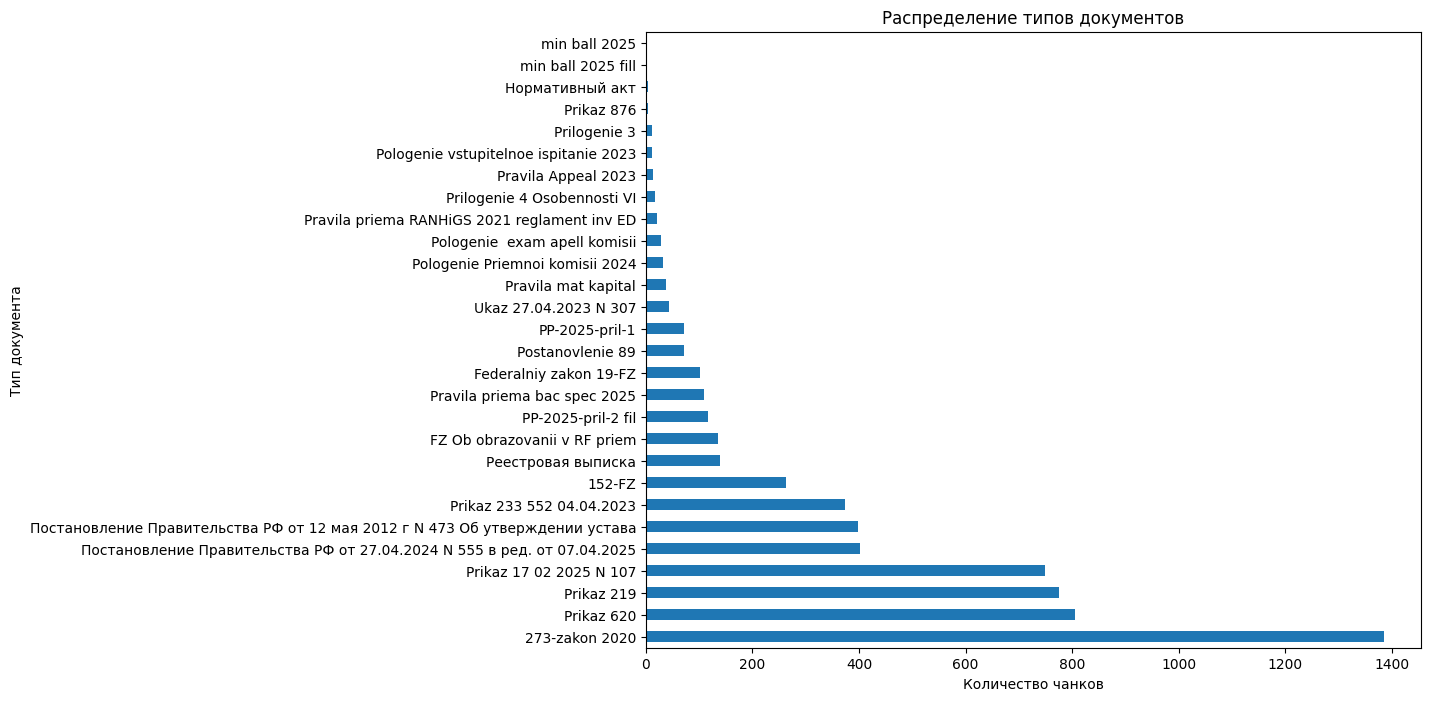

In [28]:
plt.figure(figsize=(10, 8))
doc_counts.plot(kind='barh') 
plt.title('Распределение типов документов')
plt.xlabel('Количество чанков')
plt.ylabel('Тип документа')
plt.show()

### Смотрим статистику длины чанков

In [29]:
basic_stats = df['length'].describe().round(2)
empty_chunks = (df['text'].astype(str).str.strip() == '').mean()
short_chunks = (df['length'] < 100).mean()
summary_df = pd.DataFrame({
    'Показатель': [
        'Всего чанков',
        'Средняя длина',
        'Стандартное отклонение',
        'min',
        '25%',
        '50%',
        '75%',
        'max',
        'Доля пустых чанков',
        'Доля слишком коротких (<100 символов)'
    ],
    'Значение': [
        int(basic_stats['count']),
        basic_stats['mean'],
        basic_stats['std'],
        basic_stats['min'],
        basic_stats['25%'],
        basic_stats['50%'],
        basic_stats['75%'],
        basic_stats['max'],
        f"{empty_chunks:.2%}",
        f"{short_chunks:.2%}"
    ]
})
summary_df

,Показатель,Значение
0,Всего чанков,6113
1,Средняя длина,503.61
2,Стандартное отклонение,1083.7
3,min,100.0
4,25%,183.0
5,50%,256.0
6,75%,467.0
7,max,27946.0
8,Доля пустых чанков,0.00%
9,Доля слишком коротких (<100 символов),0.00%


### Строим полную гистограмму длины чанков

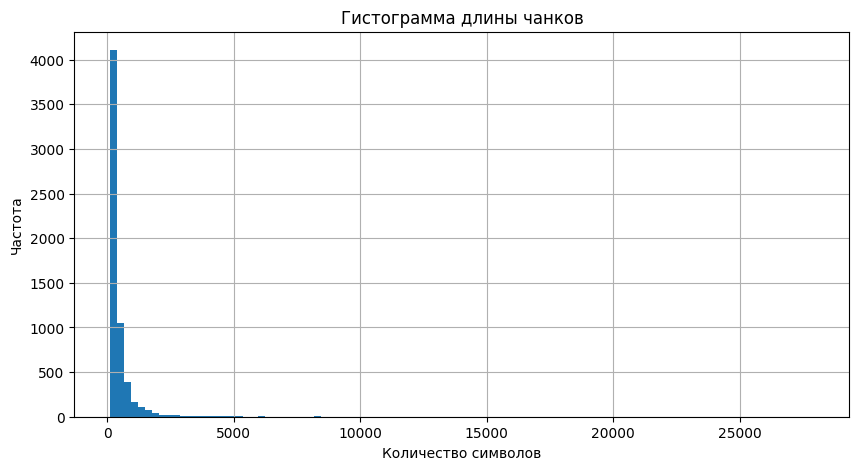

In [30]:
plt.figure(figsize=(10, 5))
df['length'].hist(bins=100)
plt.title('Гистограмма длины чанков')
plt.xlabel('Количество символов')
plt.ylabel('Частота')
plt.show()

### Строим обрезанную гистограмму длины чанков

#### обрезали до 1000, чтобы лучше просмотреть распределение, так как остальное это выбросы

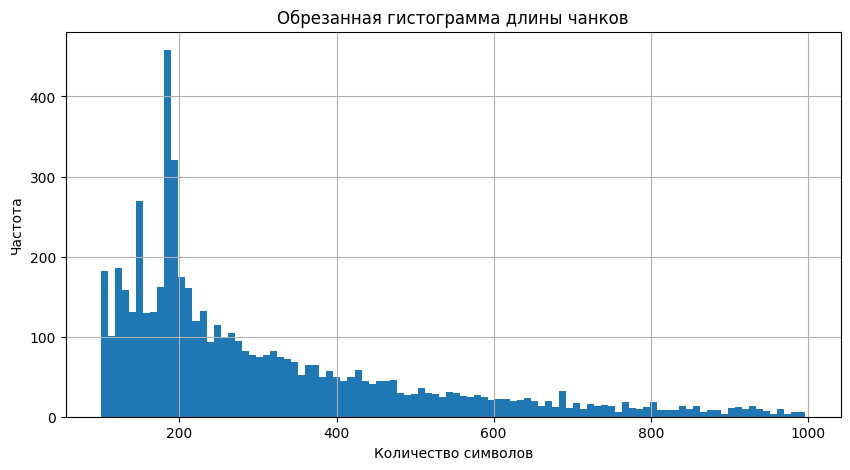

In [31]:
plt.figure(figsize=(10, 5))
df[df['length'] < 1000]['length'].hist(bins=100)
plt.title('Обрезанная гистограмма длины чанков')
plt.xlabel('Количество символов')
plt.ylabel('Частота')
plt.show()